# Problema 1
**1 - Um retificador é um circuito que converte um sinal de corrente alternada (AC) em um sinal de
corrente contínua (DC). O objetivo é gerar um nível constante (DC) a partir de um sinal de corrente
alternada, que possui valorDCigual à zero. Considere que o sinal 𝑥(𝑡) é aplicado em um retificador:
            𝑥(𝑡) = 𝐴 sen(𝑡)**

B) Admitindo o sinal de entrada dado, plote os seguintes gráficos: (i) sinal de entrada, (ii) o
sinal de saída do retificador de onda completa e (iii) a aproximação por séries de Fourier da
saída do retificador de onda completa utilizando 𝑁 = 5 harmônicas.**

**(i)-Sinal de entrada**

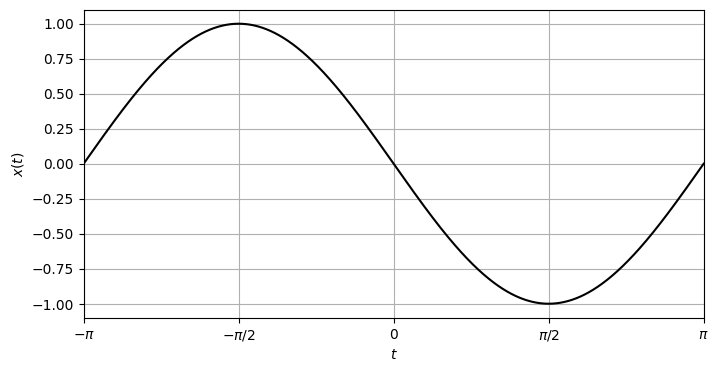

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

#Definicao do Sinal em um periodo
def xp(t):
    A = 1
    return A*(np.sin(-t))

#Amostragem do sinal
def xtilde(t,T0):
    return xp(np.mod(t,T0))

#Parametrizacao de simulacao
Ts = 1e-5                               #Passo
t = np.arange(-np.pi,np.pi,Ts)          #Vetor de tempo
T0 = 2*np.pi;                           #Periodo fundamental
w0 = 2*np.pi/T0;                        #Frequencia fundamental
x = xtilde(t,T0)

#Plotar o sinal
plt.figure(figsize=(8, 4))
plt.plot(t,x,'k')
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.grid()
plt.xlim(min(t),max(t));
plt.xticks([-np.pi,-np.pi/2, 0, np.pi/2, np.pi], ['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$']);


**ii)-Sinal de saída**

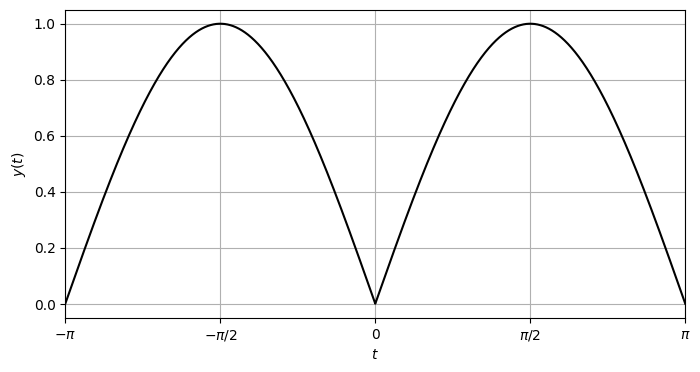

In [100]:
#Amostragem do sinal y(t)
def ytilde(t,T0):
    return abs(xp(np.mod(t,T0)))

#Parametrizacao de simulacao
Ts = 1e-5                               #Passo
t = np.arange(-np.pi,np.pi,Ts)          #Vetor de tempo
T0 = 2*np.pi;                           #Periodo fundamental
w0 = 2*np.pi/T0;                        #Frequencia fundamental
y = ytilde(t,T0)

#Plotando o sinal
plt.figure(figsize=(8, 4))
plt.plot(t,y,'k')
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.grid()
plt.xlim(min(t),max(t));
plt.xticks([-np.pi,-np.pi/2, 0, np.pi/2, np.pi], ['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$']);

**(iii)-Aproximação do Sinal de saída por série de Fourier com 5 harmônicas**

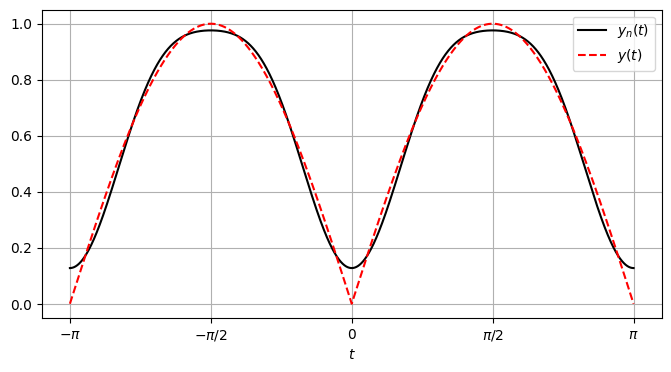

In [101]:
#Funcoes lambda para gerar os termos internos das integrais
fc = lambda t:ytilde(t,T0)*np.cos(w0*k*t)
fs = lambda t:ytilde(t,T0)*np.sin(w0*k*t)

N = 5                                  #Numero de termos da Serie de Fourier
ak = np.zeros(N)                        #Coeficientes ak
bk = np.zeros(N)                        #Coeficientes bk

#Calcular os coeficientes ak e bk
for k in np.arange(0,N):
    ak[k] = integrate.quad(fc,-T0/2,T0/2)[0]*(2.0/T0)
    bk[k] = integrate.quad(fs,-T0/2,T0/2)[0]*(2.0/T0)
ak[0] = ak[0]/2

yn = 0.0
for k in np.arange(0,N):
    if k==0:
        yn = yn + ak[k]
    else:
        yn = yn + (ak[k]*np.cos(w0*k*t)+bk[k]*np.sin(w0*k*t))

plt.figure(figsize=(8, 4))
plt.plot(t,yn, 'k', label='$y_n(t)$')
plt.plot(t,y,'--r',label='$y(t)$')
plt.xlabel('$t$')
plt.grid()
plt.xticks([-np.pi,-np.pi/2, 0, np.pi/2, np.pi], ['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
plt.legend();

# Problema 2
**2-**

(b) (M) Utilizando alguma linguagem de programação, determine numericamente a transformada
de Fourier de cada um dos sinais apresentados na Figura 1. Plote o espectro de magnitude
considerando −30 Hz ≤ 𝑓 ≤ 30 Hz.

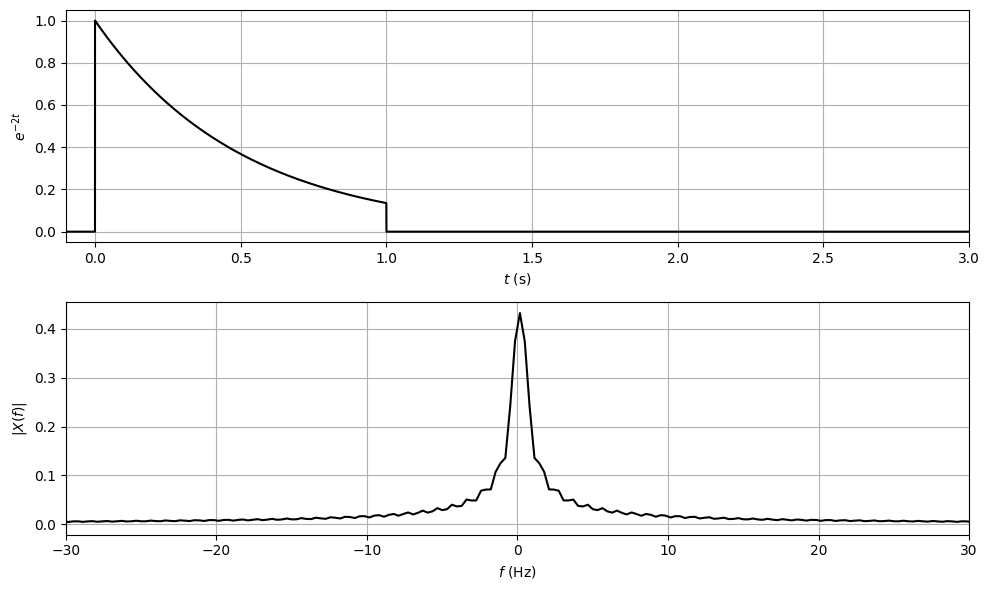

In [102]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt

#Funcao para calcular a transformada de Fourier
def ctft(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

Ts = 1e-4                               #Passo
t = np.arange(-0.1,3,Ts)                #Vetor de tempo

u = 1*(t>=0) - 1*(t>=1)
x = np.exp(-2*t)*u
f, xf = ctft(x, Ts)

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t,x,'k')
plt.xlabel('$t$ (s)')
plt.ylabel('$e^{-2t}$')
plt.grid()
plt.xlim(-0.1,3);

plt.subplot(2,1,2)
plt.plot(f,np.abs(xf),'k')
plt.xlabel('$f$ (Hz)')
plt.ylabel('$|X(f)|$')
plt.grid()
plt.xlim(-30,30);

plt.tight_layout()

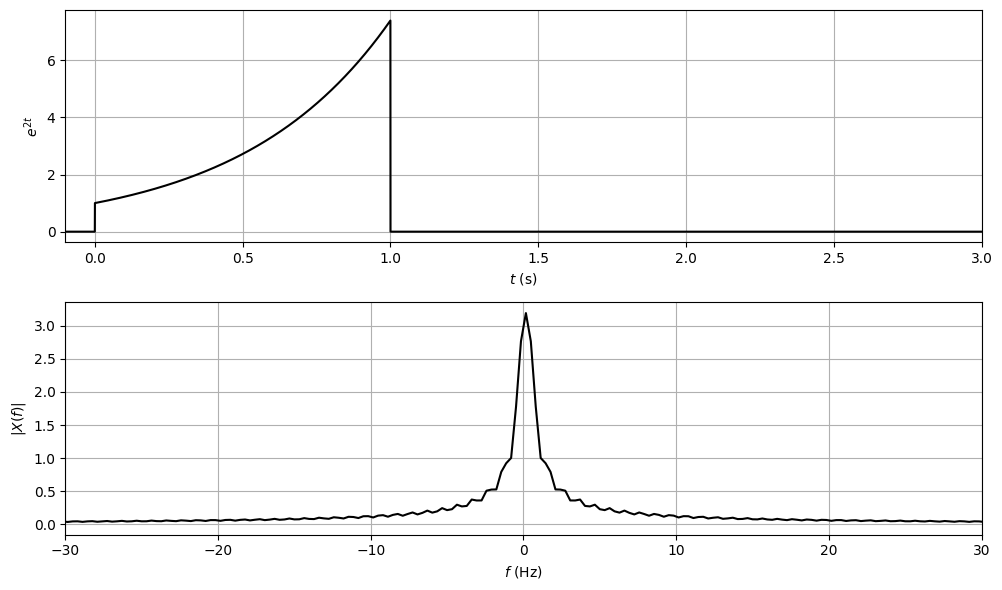

In [103]:
Ts = 1e-4                               #Passo
t = np.arange(-0.1,3,Ts)                #Vetor de tempo

u = 1*(t>=0) - 1*(t>=1)
x = np.exp(2*t)*u
f, xf = ctft(x, Ts)

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t,x,'k')
plt.xlabel('$t$ (s)')
plt.ylabel('$e^{2t}$')
plt.grid()
plt.xlim(-0.1,3);

plt.subplot(2,1,2)
plt.plot(f,np.abs(xf),'k')
plt.xlabel('$f$ (Hz)')
plt.ylabel('$|X(f)|$')
plt.grid()
plt.xlim(-30,30);

plt.tight_layout()

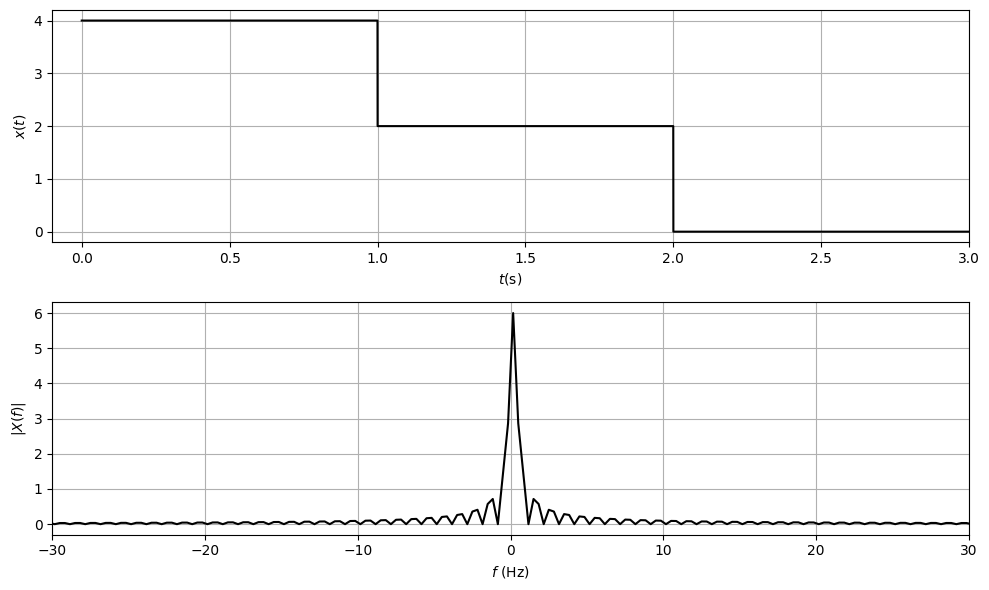

In [104]:
s = 1e-4                               #Passo
t = np.arange(0,3,Ts)                   #Vetor de tempo
u = 2*(t>=0) - 2*(t>=1)
u1 = 2*(t>=0) - 2*(t>=2)
u_t = u + u1
x = u_t
f, xf = ctft(x, Ts)

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t,x,'k')
plt.xlabel('$t$(s)')
plt.ylabel('$x(t)$')
plt.grid()
plt.xlim(-0.1,3);

plt.subplot(2,1,2)
plt.plot(f,np.abs(xf),'k')
plt.xlabel('$f$ (Hz)')
plt.ylabel('$|X(f)|$')
plt.grid()
plt.xlim(-30,30);

plt.tight_layout()

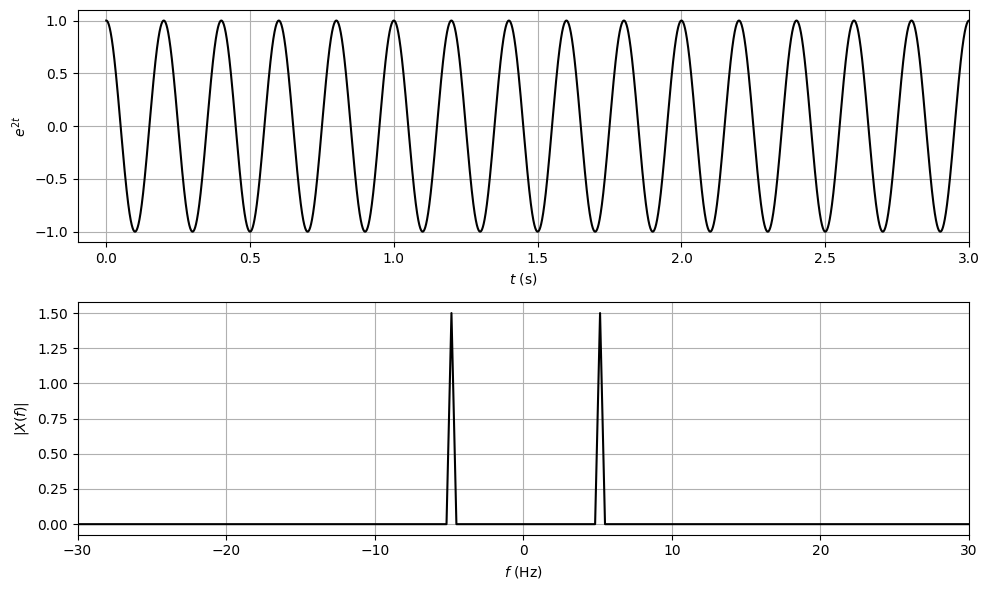

In [105]:
Ts = 1e-4                               #Passo
t = np.arange(0,3,Ts)                   #Vetor de tempo

x = np.cos(10*np.pi*t)
f, xf = ctft(x, Ts)

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t,x,'k')
plt.xlabel('$t$ (s)')
plt.ylabel('$e^{2t}$')
plt.grid()
plt.xlim(-0.1,3);

plt.subplot(2,1,2)
plt.plot(f,np.abs(xf),'k')
plt.xlabel('$f$ (Hz)')
plt.ylabel('$|X(f)|$')
plt.grid()
plt.xlim(-30,30);

plt.tight_layout()

# Problema 5
**5- Considere um sistema linear e invariante no tempo estável descrito pela seguinte equação diferencial:
$$\frac{𝑑^2}{𝑑𝑡^2}y(t)+ 5\frac{𝑑}{𝑑𝑡}y(t)+ 6y(𝑡) = -\frac{𝑑}{𝑑𝑡}x(t)$$**

B) Utilizando alguma linguagem de programação, plote o gráfico da resposta em magnitude
e resposta em fase para esse sistema.


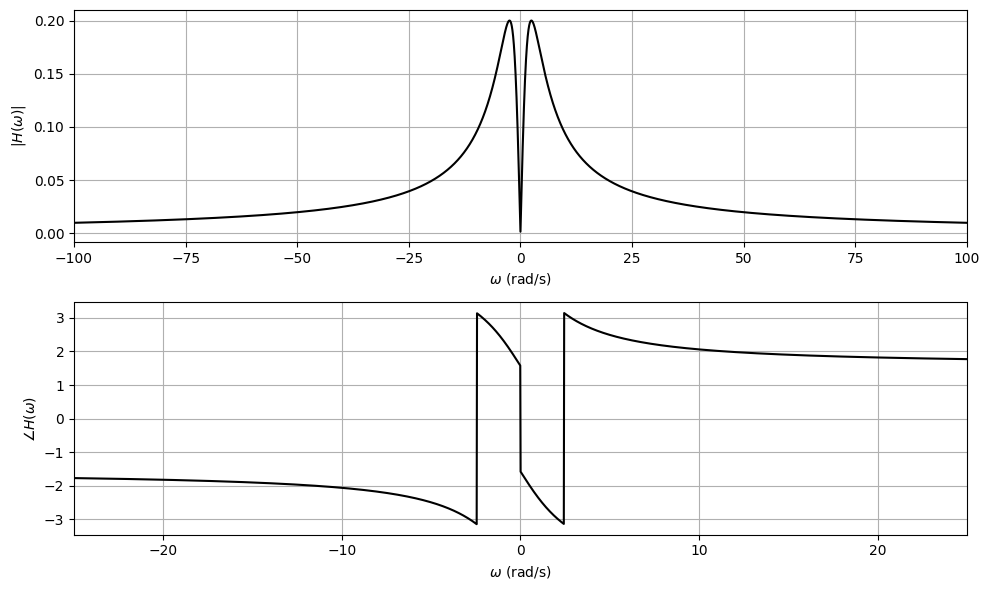

In [106]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

num = [-1, 0]
den = [1, 5, 6]
Hs = signal.TransferFunction(num, den)

w = np.linspace(-100,100,10000)
_, Hw = signal.freqresp(Hs, w)

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(w,np.abs(Hw),'k')
plt.xlabel('$\\omega$ (rad/s)')
plt.ylabel('$|H(\omega)|$')
plt.grid()
plt.xlim(min(w),max(w));

plt.subplot(2,1,2)
plt.plot(w,np.angle(Hw),'k')
plt.xlabel('$\\omega$ (rad/s)')
plt.ylabel('$\\angle H(\omega)$')
plt.grid()
plt.xlim(min(w)/4,max(w)/4);
plt.tight_layout()


# Problema 6
**6- Um sistema linear e invariante no tempo é especificado pela seguinte resposta em frequência:
$$H(𝜔)=\frac{-1}{j𝜔 - 2)} $$**

A) Utilizando alguma linguagem de programação, plote o gráfico da resposta em magnitude
e resposta em fase para esse sistema.

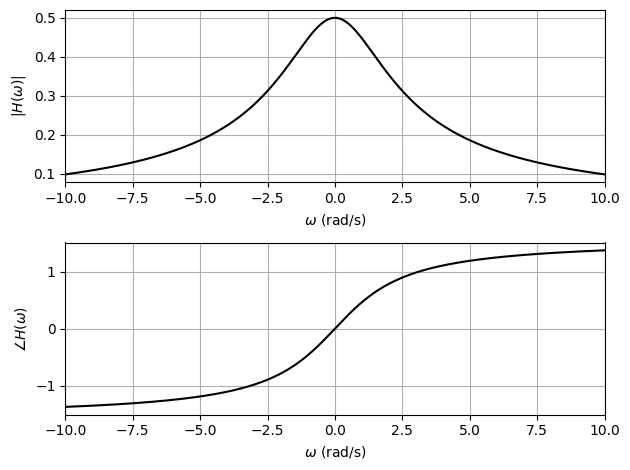

In [107]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt


w = np.linspace(-10,10,1000)
Hw = -1/(1j*w-2)

plt.figure()
plt.subplot(2,1,1)
plt.plot(w,np.abs(Hw),'k')
plt.xlabel('$\\omega$ (rad/s)')
plt.ylabel('$|H(\omega)|$')
plt.grid()
plt.xlim(min(w),max(w));

plt.subplot(2,1,2)
plt.plot(w,np.angle(Hw),'k')
plt.xlabel('$\\omega$ (rad/s)')
plt.ylabel('$\\angle H(\omega)$')
plt.grid()
plt.xlim(min(w),max(w));
plt.tight_layout()

# Problema 7
**7 Considere que um sistema de tempo contínuo possui a seguinte resposta em frequência:**

(a) (M) Utilizando alguma linguagem computacional, plote a resposta em magnitude e a resposta
em fase para esse sistema.

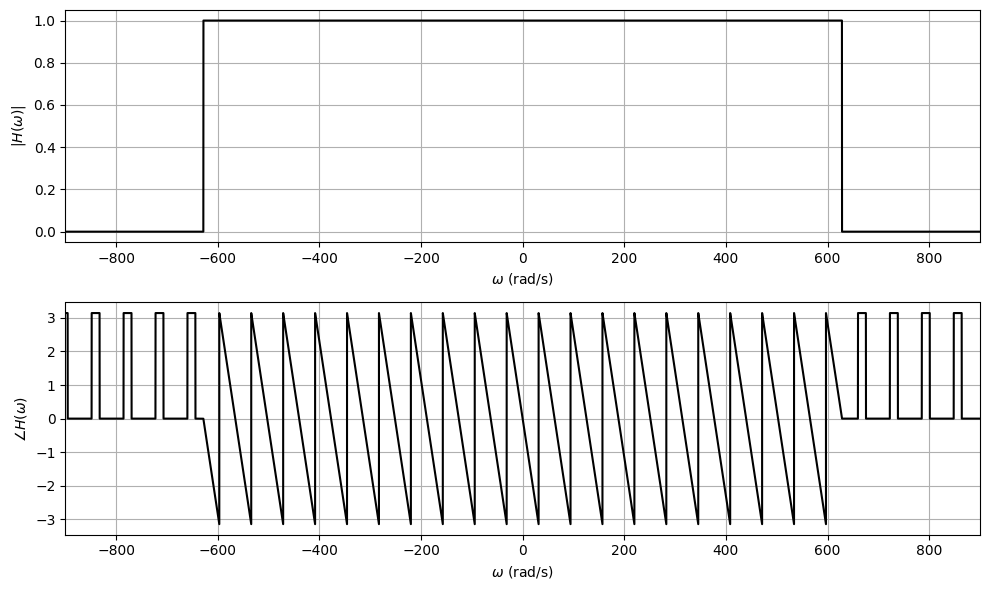

In [108]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

#Parametrizacao de simulacao
Ts = 1e-2                                              #Passo
w = np.arange(-300*np.pi,300*np.pi,Ts)                  #Vetor de tempo
Hw = (np.exp(-1j*0.1*w))*(np.abs(w)<=200*np.pi)         #Cria o meu sinal

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(w,np.abs(Hw),'k')
plt.xlabel('$\\omega$ (rad/s)')
plt.ylabel('$|H(\omega)|$')
plt.grid()
plt.xlim(-900,900);

plt.subplot(2,1,2)
plt.plot(w,np.angle(Hw),'k')
plt.xlabel('$\\omega$ (rad/s)')
plt.ylabel('$\\angle H(\omega)$')
plt.grid()
plt.xlim(-900,900);
plt.tight_layout()

# Problema 8
**8 - A modulação em amplitude convencional consiste em gerar um sinal modulado 𝜑𝐴𝑀(𝑡) tal que:**

(c) (M) Utilizando alguma linguagem de programação, implemente o modulador AM proposto.


Apresente os seguintes gráficos:

**(i)** Sinal de mensagem e sinal de portadora;

**(ii)** Espectro do sinal de mensagem e do sinal de portadora;

**(iii)** Sinal de saída do elemento não-linear;

**(iv)** Espectro de saída do sinal de saída do elemento não-linear;

**(v)** Sinal de saída do filtro passa-faixas;

**(vi)** Espectro de saída do sinal de saída do filtro passa-faixas.
Utilize como sinal modulante:


                   
                    𝑚(𝑡) = cos(2𝜋 𝑓𝑚𝑡)





com 𝑓𝑚 = 1 kHz, e como frequência de portadora 𝑓𝑐 = 10 kHz.

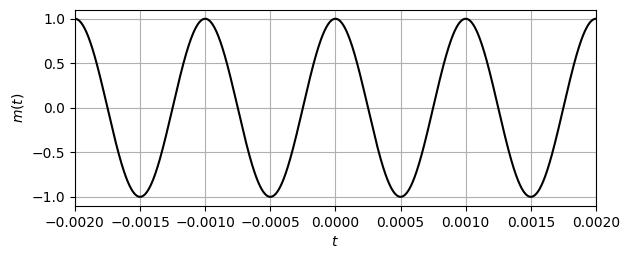

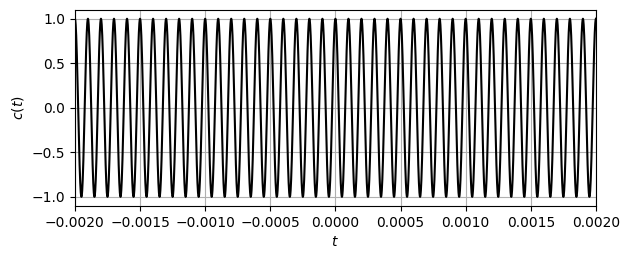

In [109]:
import numpy as np
import matplotlib.pyplot as plt

# Sinal de mensagem e sinal portador:

# Parametrizacao de simulacao
Ts = 1e-6
t = np.arange(-0.002, 0.002, Ts)

# Definindo o sinal da mensagem:
fm = 1000
m = np.cos(2*np.pi*fm*t)

# Definindo sinal de portadora:
fc = 10000
carrier = np.cos(2*np.pi*fc*t)

# Plot do sinal da mensagem
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, m, 'k')
plt.ylabel('$m(t)$')
plt.xlabel('$t$')
plt.xlim(min(t), max(t))
plt.grid()
plt.tight_layout()

# Plot do Sinal da portadora
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, carrier, 'k')
plt.ylabel('$c(t)$')
plt.xlabel('$t$')
plt.xlim(min(t), max(t))
plt.grid()
plt.tight_layout()

**parametrizacao de simulacao**

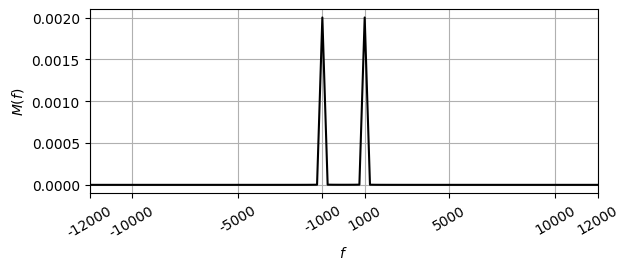

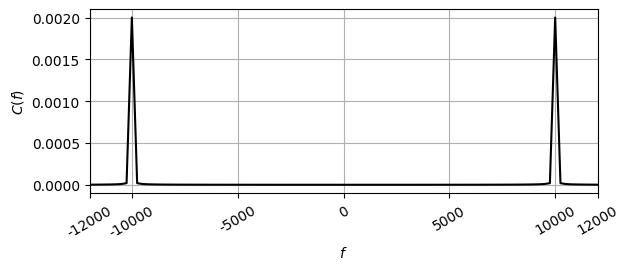

In [110]:
Ts = 1e-6
t = np.arange(-0.02, 0.02, Ts)

#Definindo especro sinal da mensagem:
f_m,Mf = ctft(m,Ts)
#Definindo espectro de sinal portadora:
f_cr,Cf = ctft(carrier,Ts)

#Plot do espectro sinal da mensagem:
plt.figure()
plt.subplot(2,1,1)
plt.plot(f_m, np.abs(Mf), 'k')
plt.ylabel('$M(f)$')
plt.xlabel('$f$')
plt.xlim(-12000,12000);
plt.xticks([-12000,-10000,-5000,-1000,1000,5000,10000,12000],['-12000','-10000','-5000','-1000','1000','5000','10000','12000'], rotation=30);
plt.grid()
plt.tight_layout();
#Plot do espectro sinal de portadora
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(f_cr, np.abs(Cf), 'k')
plt.ylabel('$C(f)$')
plt.xlabel('$f$')
plt.xlim(-12000, 12000)
plt.xticks([-12000, -10000, -5000, 0, 5000, 10000, 12000], ['-12000', '-10000', '-5000', '0', '5000', '10000', '12000'], rotation=30)
plt.grid()
plt.tight_layout()

plt.show()

**(iii) Sinal de sáida do elemento não-linear**

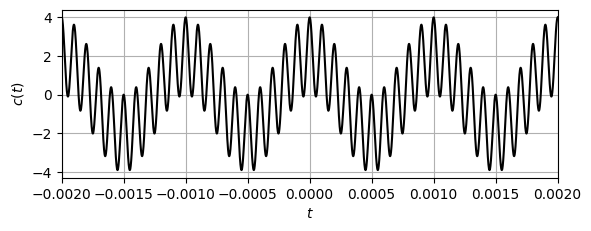

In [111]:
fm = 1000
fc = 10000
Ts = 1e-6
t = np.arange(-0.002, 0.002, Ts)

m = np.cos(2*np.pi*fm*t)

x = m + np.cos(2*np.pi*fc*t)
y = x + (1/2)*(x*2)

#Plot do sinal da portadora
plt.figure()
plt.subplot(2,1,1)
plt.plot(t,y,'k')
plt.ylabel('$c(t)$')
plt.xlabel('$t$')
plt.xlim(min(t),max(t))
plt.grid()

**(iv) Espectro do sinal de saída do elemento não-linear**

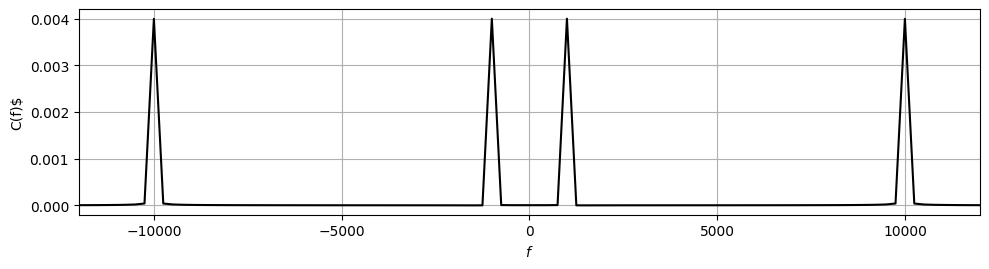

In [112]:
#definindo espectro do sinal da portadora

f_y, Yf = ctft(y, Ts)

#Plot do espectro sinal da portadora

plt.figure(figsize=[10,5])
plt.subplot(2,1,1)
plt.plot(f_y, np.abs(Yf),'k')
plt.ylabel('C(f)$')
plt.xlabel('$f$')
plt.xlim(-12000, 12000)
plt.grid()
plt.tight_layout()

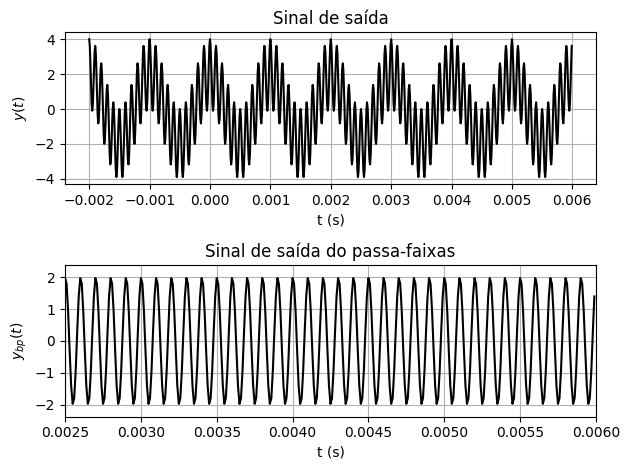

In [113]:
import numpy as np
import scipy.signal as signal
import numpy.fft as fft
import numpy.random as rnd
import matplotlib.pyplot as plt

# Função para Calcular a Transformada de Fourier
def ctft(x, Ts):
    N = len(x)
    Fs = 1 / Ts
    f = np.linspace(-Fs/2, Fs/2, N)
    xf = fft.fftshift(fft.fft(Ts * x))
    return f, xf

# Parametrização de simulação
fm = 1000  # frequência da mensagem
fc = 10000  # frequência da portadora
Ts = 1e-5  # Passo
t = np.arange(-0.002, 0.006, Ts)  # Vetor de tempo
m = np.cos(2 * np.pi * fm * t)
x = m + np.cos(2 * np.pi * fc * t)
y = x + (1/2) * (x*2)  # Correção: adição do operador * para elevar ao quadrado

f, Yf = ctft(y, Ts)

# Ordem do filtro
ordem = 4

# Filtro Passa-Bandas
fc1 = 8500
fc2 = 11500

# Frequência de corte inferior normalizada
Fs = 1 / Ts  # Correção: cálculo de Fs
Wn1 = fc1 / (Fs/2)

# Frequência de corte superior normalizada
Wn2 = fc2 / (Fs/2)

b_bp, a_bp = signal.butter(ordem, [Wn1, Wn2], btype='band')  # Cálculo dos coeficientes do filtro
y_bp = signal.lfilter(b_bp, a_bp, y)

# Plotar o sinal no tempo e na frequência
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, y, "k")
plt.xlabel('t (s)')
plt.ylabel('$y(t)$')
plt.title('Sinal de saída')
plt.grid()
plt.tight_layout()

plt.subplot(2, 1, 2)
plt.plot(t, y_bp, 'k')
plt.xlabel('t (s)')
plt.ylabel('$y_{bp}(t)$')
plt.title('Sinal de saída do passa-faixas')
plt.xlim(0.0025, 0.006)
plt.grid()
plt.tight_layout()

plt.show()

**vi - Espectro do sinal de saída do filtro passa-faixas**

(-21000.0, 21000.0)

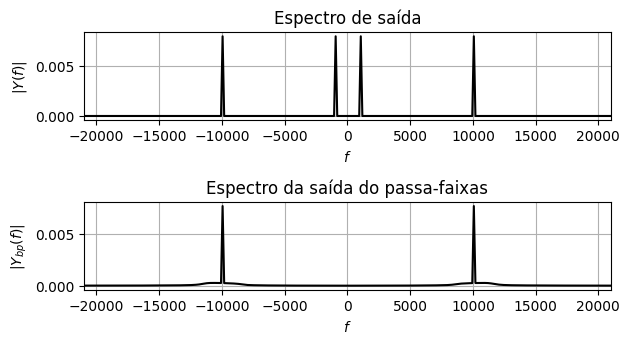

In [114]:

# Definindo espectro sinal da portadora:
f_y, Yf = ctft(y, Ts)
f_Ybp, Y_bp_f = ctft(y_bp, Ts)

# Plotar o sinal no tempo e na frequência
plt.figure()

plt.subplot(3, 1, 1)
plt.plot(f_y, np.abs(Yf), 'k')
plt.xlabel('$f$')
plt.ylabel('$|Y(f)|$')
plt.title('Espectro de saída')
plt.grid()
plt.tight_layout()
plt.xlim(-21000, 21000)

plt.subplot(3, 1, 2)
plt.plot(f_Ybp, np.abs(Y_bp_f), 'k')
plt.xlabel('$f$')
plt.ylabel('$|Y_{bp}(f)|$')
plt.title('Espectro da saída do passa-faixas')
plt.grid()
plt.tight_layout()
plt.xlim(-21000, 21000)

# Problema 10
**10 -(M) Por quase 300 anos, os astrônomos tabularam o número e o tamanho das manchas solares
usando número de Zurique. Os dados estão disponíveis no arquivo sunspot.csv, disponibilizado
em anexo. A primeira coluna da base de dados é o ano da medição e a segunda coluna é o valor do
número de Zurique. Uma grande aplicação da transformada de Fourier é verificar a periodicidade
oculta de dados de origem natural. Sabe-se que o tamanho das manchas solares apresenta uma
característica periódica ao longo do tempo. No caso, utilizaremos a transformada de Fourier para
encontrar a periodicidade dos picos do número e o tamanho das manchas solares. Diante disso**

(a) A partir da base de dados, plote o número de Zurique ao longo dos anos 1700 a 2000.
Analisando o sinal, qual é a periodicidade, em anos, dos picos das manchas solares?

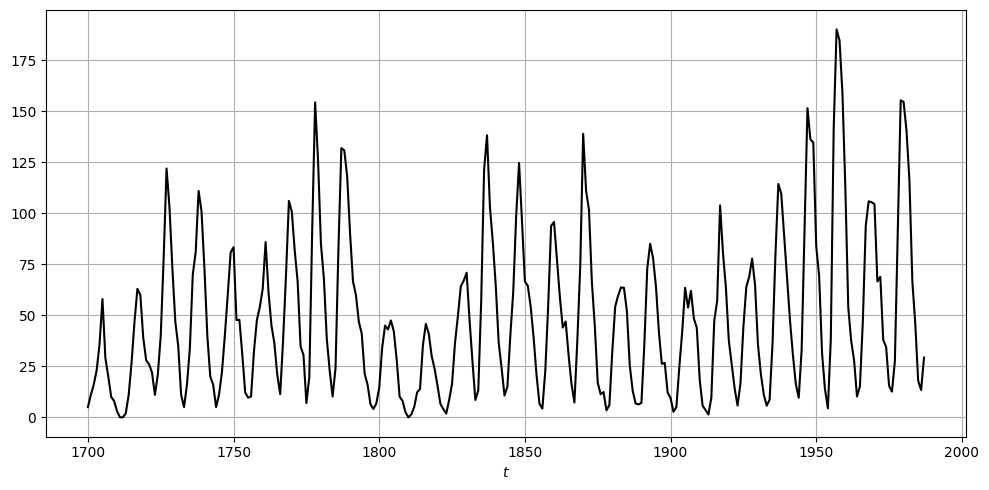

In [115]:
from numpy import genfromtxt
dados = genfromtxt('sunspot.csv', delimiter=',')

N = len(dados)
n = np.zeros(N)
x = np.zeros(N)
# n é o ano
# x é o tamnho das manchas
for k in range(N):
  n[k] = dados[k][0]
  x[k] = dados[k][1]

# Sinal x2(t) reconstruído:
plt.figure(figsize=[10,5])
plt.plot(n, x,'k')
plt.xlabel('$t$')
plt.grid()
plt.tight_layout()

(b) Determine o espectro de magnitude do sinal do item (a) utilizando algum algoritmo computacional
para a estimativa da transformada de Fourier. Para melhor visualizar os resultados,
subtraia o valor do número de Zurique de seu valor médio antes do cálculo da transformada
de Fourier. Lembre-se que o intervalo de amostragem é 𝑇𝑠 = 1 ano.

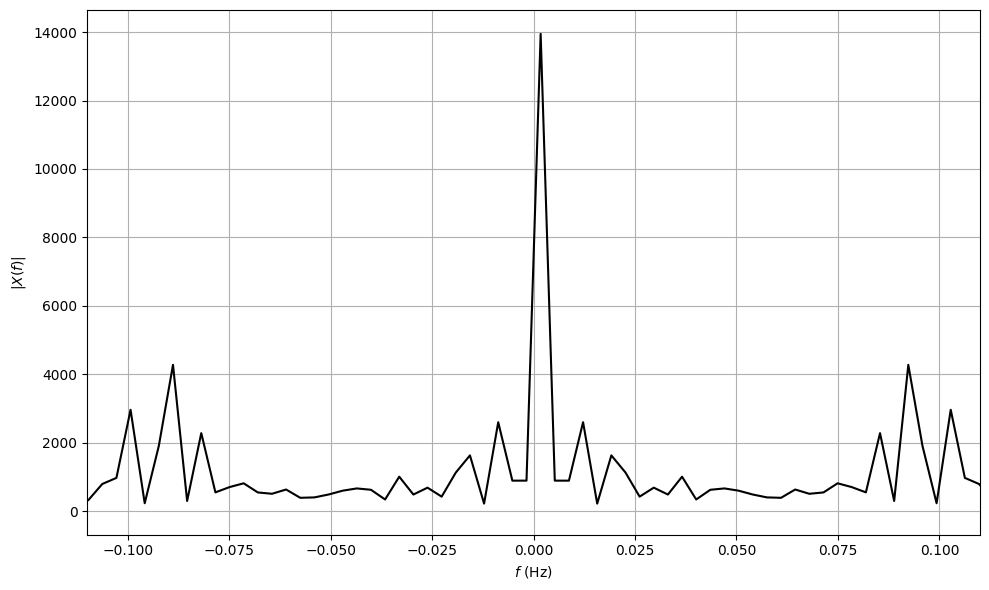

In [116]:
# Parametrizacao de simulacao:
Ts = 1

f,Xf = ctft(x,Ts)

#Plotar o sinal na na frequencia
plt.figure(figsize=[10,6])
plt.plot(f,np.abs(Xf),'k')
plt.xlabel('$f$ (Hz)')
plt.ylabel('$|X(f)|$')
plt.xlim(-0.11, 0.11)
plt.grid()
plt.tight_layout()